In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
w1 = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_week1.csv")
w12 = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_week12.csv")
w123 = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_week123.csv")
w1234 = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_week1234.csv")

In [ ]:
w1

,Unnamed: 0,enrollment_id,username,course_id,no_of_objects1,bno_access1,bno_pageclose1,bno_problem1,bno_video1,bno_discussion1,...,browser_problem1,browser_video1,server_access1,server_discussion1,server_problem1,server_navigate1,server_wiki1,bno_browser1,bno_server1,label
0,0,3,1qXC7Fjbwp66GPQc6pHLfEuO8WKozxG4,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,13,9,2,14,1,0,...,14,1,5,0,0,5,0,21,10,0
1,1,5,p1Mp7WkVfzUijX0peVQKSHbgd5pXyl4c,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,34,53,20,45,13,5,...,37,13,25,5,8,11,0,98,49,0
2,2,7,I1KwJ6EdCZnEPLfC8Q7yWpIkLOHn7h02,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,30,59,20,34,22,0,...,31,22,26,0,3,10,0,106,39,1
3,3,45,5Tz6BGN7p1lkmdoopAY1Z5ufYTrUsi9E,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,3,2,1,0,0,0,...,0,0,2,0,0,1,0,1,3,0
4,4,49,2oTvbzieHn2y5oozeOgSnruqE6N0BtR5,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,28,102,52,16,15,504,...,8,15,85,504,8,62,0,92,659,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8704,8704,199056,OGCl7FuINJMmIPxVehaSeriK0obhKOqa,SpATywNh6bZuzm8s1ceuBUnMUAeoAHHw,8,6,4,0,3,0,...,0,3,6,0,0,1,0,7,7,1
8705,8705,199057,AW3qB37tEUxBhbQEUxhofJkaUbKF4F7i,bWdj2GDclj5ofokWjzoa5jAwMkxCykd6,2,0,0,0,0,4,...,0,0,0,4,0,1,0,0,5,1
8706,8706,199058,VeLCqoeC0RO3eUOAMmBgbUdlxxqFnwbN,SpATywNh6bZuzm8s1ceuBUnMUAeoAHHw,4,4,0,0,0,0,...,0,0,4,0,0,2,0,0,6,0
8707,8707,199069,M45QNJ6951iGJajsprAeFVhHViiX50AV,A3fsA9Zfv1X2fVEQhTw51lKENdNrEqT3,22,12,10,0,9,5,...,0,9,12,5,0,5,1,19,23,1


In [ ]:
w1.drop('Unnamed: 0', axis=1, inplace=True)
w12.drop('Unnamed: 0', axis=1, inplace=True)
w123.drop('Unnamed: 0', axis=1, inplace=True)
w1234.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
w1_test = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_week1_test.csv")
w12_test = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_week12_test.csv")
w123_test = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_week123_test.csv")
w1234_test = pd.read_csv("/content/drive/MyDrive/Mitacs project/dataset/Datafull/features_week1234_test.csv")

In [ ]:
w1_test

,Unnamed: 0,enrollment_id,username,course_id,no_of_objects1,bno_access1,bno_pageclose1,bno_problem1,bno_video1,bno_discussion1,...,browser_problem1,browser_video1,server_access1,server_discussion1,server_problem1,server_navigate1,server_wiki1,bno_browser1,bno_server1,label
0,0,34,OeLBIzS0gNQ56euxy5b66gAZMzQCGE7n,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,10,12,5,4,3,0,...,3,3,11,0,1,7,1,12,20,0
1,1,66,cGrHiRjztN9fSltHujpfWaaWfYWiidiG,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,32,125,30,62,11,68,...,46,11,67,68,16,17,0,145,168,0
2,2,89,Po17baTutQqG3KBkMaahpxQ7IpjhFfZa,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,16,35,2,17,13,0,...,14,13,15,0,3,5,0,49,23,1
3,3,145,TZOWoG0yzTTzAfx5K054mpl5rZTlZIcZ,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,31,69,23,56,10,25,...,52,10,47,25,4,5,2,107,83,1
4,4,163,jJZ8z8M2beLy33Z7JJbNFq1bQd8o43FV,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,4,2,0,0,0,0,...,0,0,2,0,0,2,0,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,5774,199048,seGsWY5pHJdYc0dygxkfgWkiK3wzJxVH,A3fsA9Zfv1X2fVEQhTw51lKENdNrEqT3,5,3,1,0,1,0,...,0,1,2,0,0,2,0,3,4,1
5775,5775,199063,ODCx2UO2z0ldelF48alKkiQzrvYMM8sJ,G8EPVSXsOYB5YQWZGiz1aVq5Pgr2GrQu,9,6,3,2,1,0,...,2,1,3,0,0,9,0,9,12,1
5776,5776,199068,TTLR6K3ZlbSrGOfX2kjd2U4ChldGiopU,RXDvfPUBYFlVdlueBFbLW0mhhAyGEqpt,5,3,1,0,0,0,...,0,0,3,0,0,3,0,1,6,1
5777,5777,199070,mne1Bu1F2f0U7iravmS4eQYQtLTkVvPe,A3fsA9Zfv1X2fVEQhTw51lKENdNrEqT3,9,4,3,0,3,0,...,0,3,4,0,0,3,0,6,7,1


In [ ]:
w1_test.drop('Unnamed: 0', axis=1, inplace=True)
w12_test.drop('Unnamed: 0', axis=1, inplace=True)
w123_test.drop('Unnamed: 0', axis=1, inplace=True)
w1234_test.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
w1 = pd.concat([w1, w1_test], axis=0)
w12 = pd.concat([w12, w12_test], axis=0)
w123 = pd.concat([w123, w123_test], axis=0)
w1234 = pd.concat([w1234, w1234_test], axis=0)

In [ ]:
w1

,enrollment_id,username,course_id,no_of_objects1,bno_access1,bno_pageclose1,bno_problem1,bno_video1,bno_discussion1,bno_navigate1,...,browser_problem1,browser_video1,server_access1,server_discussion1,server_problem1,server_navigate1,server_wiki1,bno_browser1,bno_server1,label
0,3,1qXC7Fjbwp66GPQc6pHLfEuO8WKozxG4,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,13,9,2,14,1,0,5,...,14,1,5,0,0,5,0,21,10,0
1,5,p1Mp7WkVfzUijX0peVQKSHbgd5pXyl4c,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,34,53,20,45,13,5,11,...,37,13,25,5,8,11,0,98,49,0
2,7,I1KwJ6EdCZnEPLfC8Q7yWpIkLOHn7h02,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,30,59,20,34,22,0,10,...,31,22,26,0,3,10,0,106,39,1
3,45,5Tz6BGN7p1lkmdoopAY1Z5ufYTrUsi9E,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,3,2,1,0,0,0,1,...,0,0,2,0,0,1,0,1,3,0
4,49,2oTvbzieHn2y5oozeOgSnruqE6N0BtR5,7GRhBDsirIGkRZBtSMEzNTyDr2JQm4xx,28,102,52,16,15,504,62,...,8,15,85,504,8,62,0,92,659,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5774,199048,seGsWY5pHJdYc0dygxkfgWkiK3wzJxVH,A3fsA9Zfv1X2fVEQhTw51lKENdNrEqT3,5,3,1,0,1,0,2,...,0,1,2,0,0,2,0,3,4,1
5775,199063,ODCx2UO2z0ldelF48alKkiQzrvYMM8sJ,G8EPVSXsOYB5YQWZGiz1aVq5Pgr2GrQu,9,6,3,2,1,0,9,...,2,1,3,0,0,9,0,9,12,1
5776,199068,TTLR6K3ZlbSrGOfX2kjd2U4ChldGiopU,RXDvfPUBYFlVdlueBFbLW0mhhAyGEqpt,5,3,1,0,0,0,3,...,0,0,3,0,0,3,0,1,6,1
5777,199070,mne1Bu1F2f0U7iravmS4eQYQtLTkVvPe,A3fsA9Zfv1X2fVEQhTw51lKENdNrEqT3,9,4,3,0,3,0,3,...,0,3,4,0,0,3,0,6,7,1


### Week 1 - preprocessing

In [ ]:
w1['username']=pd.factorize(w1['username'])[0]         #converting to numerical data
w1['course_id']=pd.factorize(w1['course_id'])[0]

In [ ]:
x1=w1.drop('label',axis=1)
y1=w1['label']

In [ ]:
scaler = MinMaxScaler()
cols_to_norm = x1.iloc[:, 3:].columns
x1[cols_to_norm] = scaler.fit_transform(x1[cols_to_norm])

In [ ]:
smote = SMOTE()
# fit predictor and target variable
x1_smote, y1_smote = smote.fit_resample(x1, y1)
print('Original dataset shape', Counter(y1))
print('Resample dataset shape', Counter(y1_smote))

Original dataset shape Counter({1: 11345, 0: 3143})
Resample dataset shape Counter({0: 11345, 1: 11345})


In [ ]:
'''scaler = MinMaxScaler()
#cols_to_norm = x1.iloc[:, 3:].columns
minmax_scaled = scaler.fit_transform(x1)
x1_scaled = pd.DataFrame(minmax_scaled, columns=x1.columns)'''

'scaler = MinMaxScaler()\n#cols_to_norm = x1.iloc[:, 3:].columns\nminmax_scaled = scaler.fit_transform(x1)\nx1_scaled = pd.DataFrame(minmax_scaled, columns=x1.columns)'

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1_smote, y1_smote, test_size=0.3, random_state=7)   # Train test split

In [ ]:
y_train1

20715    0
4254     1
6403     1
13518    1
14378    1
        ..
919      0
20691    0
5699     1
10742    1
16921    0
Name: label, Length: 15883, dtype: int64

### Week 1 + Week 2 - Preprocessing

In [ ]:
w12['username']=pd.factorize(w12['username'])[0]         #converting to numerical data
w12['course_id']=pd.factorize(w12['course_id'])[0]

In [ ]:
x12=w12.drop('label',axis=1)
y12=w12['label']

In [ ]:
scaler = MinMaxScaler()
cols_to_norm = x12.iloc[:, 3:].columns
x12[cols_to_norm] = scaler.fit_transform(x12[cols_to_norm])

In [ ]:
smote = SMOTE()
# fit predictor and target variable
x12_smote, y12_smote = smote.fit_resample(x12, y12)
print('Original dataset shape', Counter(y12))
print('Resample dataset shape', Counter(y12_smote))

Original dataset shape Counter({1: 14829, 0: 3730})
Resample dataset shape Counter({0: 14829, 1: 14829})


In [ ]:
x_train12, x_test12, y_train12, y_test12 = train_test_split(x12_smote, y12_smote, test_size=0.3, random_state=7)   # Train test split

### Week 1 + Week 2 + Week 3 processing

In [ ]:
w123['username']=pd.factorize(w123['username'])[0]         #converting to numerical data
w123['course_id']=pd.factorize(w123['course_id'])[0]

In [ ]:
x123=w123.drop('label',axis=1)
y123=w123['label']

In [ ]:
scaler = MinMaxScaler()
cols_to_norm = x123.iloc[:, 3:].columns
x123[cols_to_norm] = scaler.fit_transform(x123[cols_to_norm])

In [ ]:
smote = SMOTE()
# fit predictor and target variable
x123_smote, y123_smote = smote.fit_resample(x123, y123)
print('Original dataset shape', Counter(y123))
print('Resample dataset shape', Counter(y123_smote))

Original dataset shape Counter({1: 5624, 0: 3071})
Resample dataset shape Counter({0: 5624, 1: 5624})


In [ ]:
x_train123, x_test123, y_train123, y_test123 = train_test_split(x123_smote, y123_smote, test_size=0.3, random_state=7)   # Train test split

### Week 1 + Week 2 + Week 3 + Week 4 preprocessing

In [ ]:
w1234['username']=pd.factorize(w1234['username'])[0]         #converting to numerical data
w1234['course_id']=pd.factorize(w1234['course_id'])[0]

In [ ]:
x1234=w1234.drop('label',axis=1)
y1234=w1234['label']

In [ ]:
scaler = MinMaxScaler()
cols_to_norm = x1234.iloc[:, 3:].columns
x1234[cols_to_norm] = scaler.fit_transform(x1234[cols_to_norm])

In [ ]:
smote = SMOTE()
# fit predictor and target variable
x1234_smote, y1234_smote = smote.fit_resample(x1234, y1234)
print('Original dataset shape', Counter(y1234))
print('Resample dataset shape', Counter(y1234_smote))

Original dataset shape Counter({1: 29603, 0: 6541})
Resample dataset shape Counter({0: 29603, 1: 29603})


In [ ]:
x_train1234, x_test1234, y_train1234, y_test1234 = train_test_split(x1234_smote, y1234_smote, test_size=0.3, random_state=7)   # Train test split

### Week 1 - training

#### KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 )  
knn.fit(x_train1, y_train1)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
predictions_knn = knn.predict(x_test1)
print(classification_report(y_test1,predictions_knn))

              precision    recall  f1-score   support

           0       0.70      0.83      0.76      3423
           1       0.79      0.64      0.71      3384

    accuracy                           0.74      6807
   macro avg       0.75      0.74      0.73      6807
weighted avg       0.75      0.74      0.73      6807



#### Decision Trees

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train1, y_train1)

DecisionTreeClassifier()

In [ ]:
predictions_dt = dt.predict(x_test1)
print(classification_report(y_test1,predictions_dt))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      3423
           1       0.83      0.80      0.82      3384

    accuracy                           0.82      6807
   macro avg       0.82      0.82      0.82      6807
weighted avg       0.82      0.82      0.82      6807



#### Logistic Regression

In [ ]:
lr=LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(x_train1, y_train1)

LogisticRegression(max_iter=1000)

In [ ]:
predictions_lr = lr.predict(x_test1)
print(classification_report(y_test1,predictions_lr))

              precision    recall  f1-score   support

           0       0.62      0.28      0.39      3423
           1       0.53      0.82      0.65      3384

    accuracy                           0.55      6807
   macro avg       0.58      0.55      0.52      6807
weighted avg       0.58      0.55      0.52      6807



#### Gaussian Bayes

In [ ]:
gnb=GaussianNB()
gnb.fit(x_train1, y_train1)

GaussianNB()

In [ ]:
predictions_gnb = gnb.predict(x_test1)
print(classification_report(y_test1,predictions_gnb))

              precision    recall  f1-score   support

           0       0.64      0.72      0.68      3423
           1       0.68      0.60      0.64      3384

    accuracy                           0.66      6807
   macro avg       0.66      0.66      0.66      6807
weighted avg       0.66      0.66      0.66      6807



#### SVM

In [ ]:
model1=SVC()
model1.fit(x_train1, y_train1)

SVC()

In [ ]:
predictions1 = model1.predict(x_test1)
print(classification_report(y_test1,predictions1))

              precision    recall  f1-score   support

           0       0.71      0.62      0.66      3423
           1       0.66      0.74      0.70      3384

    accuracy                           0.68      6807
   macro avg       0.68      0.68      0.68      6807
weighted avg       0.68      0.68      0.68      6807



#### XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train1, y_train1)

XGBClassifier()

In [ ]:
predictions_xgb = xgb.predict(x_test1)
print(classification_report(y_test1,predictions_xgb))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      3423
           1       0.86      0.90      0.88      3384

    accuracy                           0.88      6807
   macro avg       0.88      0.88      0.88      6807
weighted avg       0.88      0.88      0.88      6807



#### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train1, y_train1)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
predictions_rf = rf.predict(x_test1)
print(classification_report(y_test1,predictions_rf))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80      3423
           1       0.81      0.76      0.78      3384

    accuracy                           0.79      6807
   macro avg       0.79      0.79      0.79      6807
weighted avg       0.79      0.79      0.79      6807



#### Ensemble

In [ ]:
ens = VotingClassifier(estimators=[('svc', model1), ('xgb', xgb), ('rf', rf)], voting='hard')
ens.fit(x_train1,y_train1)

VotingClassifier(estimators=[('svc', SVC()), ('xgb', XGBClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=2,
                                                     random_state=0))])

In [ ]:
predictions_ens = ens.predict(x_test1)
print(classification_report(y_test1,predictions_ens))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      3423
           1       0.83      0.86      0.85      3384

    accuracy                           0.84      6807
   macro avg       0.84      0.84      0.84      6807
weighted avg       0.84      0.84      0.84      6807



In [ ]:
ens1 = VotingClassifier(estimators=[('dt', dt), ('xgb', xgb), ('rf', rf)], voting='hard')
ens1.fit(x_train1,y_train1)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('xgb', XGBClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=2,
                                                     random_state=0))])

In [ ]:
predictions_ens1 = ens1.predict(x_test1)
print(classification_report(y_test1,predictions_ens1))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87      3423
           1       0.87      0.86      0.86      3384

    accuracy                           0.87      6807
   macro avg       0.87      0.87      0.87      6807
weighted avg       0.87      0.87      0.87      6807



In [ ]:
ens2 = VotingClassifier(estimators=[('knn', knn), ('xgb', xgb), ('rf', rf)], voting='hard')
ens2.fit(x_train1,y_train1)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=4)),
                             ('xgb', XGBClassifier()),
                             ('rf',
                              RandomForestClassifier(max_depth=2,
                                                     random_state=0))])

In [ ]:
predictions_ens2 = ens2.predict(x_test1)
print(classification_report(y_test1,predictions_ens2))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86      3423
           1       0.87      0.85      0.86      3384

    accuracy                           0.86      6807
   macro avg       0.86      0.86      0.86      6807
weighted avg       0.86      0.86      0.86      6807



In [ ]:
### DT, SVM, XGB, Random Forest
ens3 = VotingClassifier(estimators=[('dt', dt), ('svc', model1), ('xgb', xgb), ('rf', rf)], voting='hard')
ens3.fit(x_train1,y_train1)

predictions_ens3 = ens3.predict(x_test1)
print(classification_report(y_test1,predictions_ens3))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      3423
           1       0.89      0.80      0.84      3384

    accuracy                           0.85      6807
   macro avg       0.85      0.85      0.85      6807
weighted avg       0.85      0.85      0.85      6807



### Week 1 + Week 2 - training

#### SVC

In [ ]:
model12=SVC()
model12.fit(x_train12, y_train12)

SVC()

In [ ]:
predictions12 = model12.predict(x_test12)
print(classification_report(y_test12,predictions12))

              precision    recall  f1-score   support

           0       0.68      0.63      0.65      4487
           1       0.65      0.70      0.67      4411

    accuracy                           0.66      8898
   macro avg       0.67      0.67      0.66      8898
weighted avg       0.67      0.66      0.66      8898



#### KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 )  
knn.fit(x_train12, y_train12)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
predictions12_knn = knn.predict(x_test12)
print(classification_report(y_test12,predictions12_knn))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75      4487
           1       0.78      0.61      0.69      4411

    accuracy                           0.72      8898
   macro avg       0.73      0.72      0.72      8898
weighted avg       0.73      0.72      0.72      8898



#### Decision Trees

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train12, y_train12)

DecisionTreeClassifier()

In [ ]:
predictions12_dt = dt.predict(x_test12)
print(classification_report(y_test12,predictions12_dt))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4487
           1       0.84      0.83      0.83      4411

    accuracy                           0.84      8898
   macro avg       0.84      0.84      0.84      8898
weighted avg       0.84      0.84      0.84      8898



#### XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train12, y_train12)

XGBClassifier()

In [ ]:
predictions_xgb = xgb.predict(x_test12)
print(classification_report(y_test12,predictions_xgb))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      4487
           1       0.86      0.91      0.88      4411

    accuracy                           0.88      8898
   macro avg       0.88      0.88      0.88      8898
weighted avg       0.88      0.88      0.88      8898



#### Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train12, y_train12)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
predictions_rf = rf.predict(x_test12)
print(classification_report(y_test12,predictions_rf))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      4487
           1       0.82      0.76      0.79      4411

    accuracy                           0.80      8898
   macro avg       0.80      0.80      0.80      8898
weighted avg       0.80      0.80      0.80      8898



#### Ensembles

In [ ]:
ens = VotingClassifier(estimators=[('svc', model12), ('xgb', xgb), ('rf', rf)], voting='hard')
ens.fit(x_train12,y_train12)
predictions_ens = ens.predict(x_test12)
print(classification_report(y_test12,predictions_ens))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4487
           1       0.84      0.86      0.85      4411

    accuracy                           0.85      8898
   macro avg       0.85      0.85      0.85      8898
weighted avg       0.85      0.85      0.85      8898



In [ ]:
ens1 = VotingClassifier(estimators=[('knn', knn), ('xgb', xgb), ('rf', rf)], voting='hard')
ens1.fit(x_train12,y_train12)
predictions_ens = ens.predict(x_test12)
print(classification_report(y_test12,predictions_ens))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4487
           1       0.84      0.86      0.85      4411

    accuracy                           0.85      8898
   macro avg       0.85      0.85      0.85      8898
weighted avg       0.85      0.85      0.85      8898



In [ ]:
ens2 = VotingClassifier(estimators=[('dt', dt), ('xgb', xgb), ('rf', rf)], voting='hard')
ens2.fit(x_train12,y_train12)
predictions_ens = ens.predict(x_test12)
print(classification_report(y_test12,predictions_ens))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      4487
           1       0.84      0.86      0.85      4411

    accuracy                           0.85      8898
   macro avg       0.85      0.85      0.85      8898
weighted avg       0.85      0.85      0.85      8898



In [ ]:
### DT, SVM, XGB, Random Forest
ens3 = VotingClassifier(estimators=[('dt', dt), ('svc', model12), ('xgb', xgb), ('rf', rf)], voting='hard')
ens3.fit(x_train12,y_train12)
predictions_ens3 = ens3.predict(x_test12)
print(classification_report(y_test12,predictions_ens3))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      4487
           1       0.89      0.81      0.85      4411

    accuracy                           0.85      8898
   macro avg       0.86      0.85      0.85      8898
weighted avg       0.86      0.85      0.85      8898



### Week 1 + Week 2 + Week 3 - training

#### SVM

In [ ]:
model123=SVC()
model123.fit(x_train123, y_train123)

SVC()

In [ ]:
predictions123 = model123.predict(x_test123)
print(classification_report(y_test123,predictions123))

              precision    recall  f1-score   support

           0       0.71      0.59      0.65      1704
           1       0.65      0.76      0.70      1671

    accuracy                           0.68      3375
   macro avg       0.68      0.68      0.67      3375
weighted avg       0.68      0.68      0.67      3375



#### KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 )  
knn.fit(x_train123, y_train123)
predictions123_knn = knn.predict(x_test123)
print(classification_report(y_test123,predictions123_knn))

              precision    recall  f1-score   support

           0       0.67      0.83      0.74      1704
           1       0.77      0.58      0.66      1671

    accuracy                           0.71      3375
   macro avg       0.72      0.70      0.70      3375
weighted avg       0.72      0.71      0.70      3375



#### Decision Tree

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train123, y_train123)
predictions123_dt = dt.predict(x_test123)
print(classification_report(y_test123,predictions123_dt))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1704
           1       0.74      0.73      0.73      1671

    accuracy                           0.74      3375
   macro avg       0.74      0.74      0.74      3375
weighted avg       0.74      0.74      0.74      3375



#### XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train123, y_train123)
predictions_xgb = xgb.predict(x_test123)
print(classification_report(y_test123,predictions_xgb))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1704
           1       0.81      0.80      0.80      1671

    accuracy                           0.80      3375
   macro avg       0.80      0.80      0.80      3375
weighted avg       0.80      0.80      0.80      3375



#### Random Forest 

In [ ]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train123, y_train123)
predictions_rf = rf.predict(x_test123)
print(classification_report(y_test123,predictions_rf))

              precision    recall  f1-score   support

           0       0.74      0.73      0.73      1704
           1       0.73      0.73      0.73      1671

    accuracy                           0.73      3375
   macro avg       0.73      0.73      0.73      3375
weighted avg       0.73      0.73      0.73      3375



#### Ensembles

In [ ]:
ens = VotingClassifier(estimators=[('svc', model123), ('xgb', xgb), ('rf', rf)], voting='hard')
ens.fit(x_train123,y_train123)

predictions_ens = ens.predict(x_test123)
print(classification_report(y_test123,predictions_ens))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1704
           1       0.78      0.78      0.78      1671

    accuracy                           0.78      3375
   macro avg       0.78      0.78      0.78      3375
weighted avg       0.78      0.78      0.78      3375



In [ ]:
ens1 = VotingClassifier(estimators=[('knn', knn), ('xgb', xgb), ('rf', rf)], voting='hard')
ens1.fit(x_train123,y_train123)

predictions_ens = ens1.predict(x_test123)
print(classification_report(y_test123,predictions_ens))

              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1704
           1       0.81      0.75      0.78      1671

    accuracy                           0.79      3375
   macro avg       0.79      0.79      0.79      3375
weighted avg       0.79      0.79      0.79      3375



In [ ]:
ens2 = VotingClassifier(estimators=[('dt', dt), ('xgb', xgb), ('rf', rf)], voting='hard')
ens2.fit(x_train123,y_train123)

predictions_ens = ens2.predict(x_test123)
print(classification_report(y_test123,predictions_ens))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1704
           1       0.78      0.78      0.78      1671

    accuracy                           0.78      3375
   macro avg       0.78      0.78      0.78      3375
weighted avg       0.78      0.78      0.78      3375



In [ ]:
### DT, SVM, XGB, Random Forest
ens3 = VotingClassifier(estimators=[('dt', dt), ('svc', model123), ('xgb', xgb), ('rf', rf)], voting='hard')
ens3.fit(x_train123,y_train123)

predictions_ens3 = ens3.predict(x_test123)
print(classification_report(y_test123,predictions_ens3))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1704
           1       0.81      0.73      0.77      1671

    accuracy                           0.78      3375
   macro avg       0.79      0.78      0.78      3375
weighted avg       0.79      0.78      0.78      3375



### Week 1 + Week 2 + Week 3 + Week 4 - training

#### SVC

In [ ]:
model1234=SVC()
model1234.fit(x_train1234, y_train1234)

SVC()

In [ ]:
predictions1234 = model1234.predict(x_test1234)
print(classification_report(y_test1234,predictions1234))

              precision    recall  f1-score   support

           0       0.66      0.59      0.63      8811
           1       0.64      0.70      0.67      8951

    accuracy                           0.65     17762
   macro avg       0.65      0.65      0.65     17762
weighted avg       0.65      0.65      0.65     17762



#### KNN

In [ ]:
knn=KNeighborsClassifier(n_neighbors=4, metric='minkowski', p=2 )  
knn.fit(x_train1234, y_train1234)
predictions1234_knn = knn.predict(x_test1234)
print(classification_report(y_test1234,predictions1234_knn))

              precision    recall  f1-score   support

           0       0.67      0.84      0.75      8811
           1       0.79      0.60      0.68      8951

    accuracy                           0.72     17762
   macro avg       0.73      0.72      0.71     17762
weighted avg       0.73      0.72      0.71     17762



#### Decision Tree

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(x_train1234, y_train1234)
predictions1234_dt = dt.predict(x_test1234)
print(classification_report(y_test1234,predictions1234_dt))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      8811
           1       0.88      0.87      0.87      8951

    accuracy                           0.87     17762
   macro avg       0.87      0.87      0.87     17762
weighted avg       0.87      0.87      0.87     17762



#### XGBoost

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train1234, y_train1234)
predictions_xgb = xgb.predict(x_test1234)
print(classification_report(y_test1234,predictions_xgb))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      8811
           1       0.89      0.93      0.91      8951

    accuracy                           0.91     17762
   macro avg       0.91      0.90      0.90     17762
weighted avg       0.91      0.91      0.90     17762



#### Random Forest

In [ ]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train1234, y_train1234)
predictions_rf = rf.predict(x_test1234)
print(classification_report(y_test1234,predictions_rf))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      8811
           1       0.80      0.83      0.82      8951

    accuracy                           0.81     17762
   macro avg       0.81      0.81      0.81     17762
weighted avg       0.81      0.81      0.81     17762



#### Ensembles

In [ ]:
ens = VotingClassifier(estimators=[('svc', model1234), ('xgb', xgb), ('rf', rf)], voting='hard')
ens.fit(x_train1234,y_train1234)

predictions_ens = ens.predict(x_test1234)
print(classification_report(y_test1234,predictions_ens))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      8811
           1       0.82      0.89      0.85      8951

    accuracy                           0.84     17762
   macro avg       0.85      0.84      0.84     17762
weighted avg       0.85      0.84      0.84     17762



In [ ]:
ens1 = VotingClassifier(estimators=[('knn', knn), ('xgb', xgb), ('rf', rf)], voting='hard')
ens1.fit(x_train1234,y_train1234)

predictions_ens = ens1.predict(x_test1234)
print(classification_report(y_test1234,predictions_ens))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      8811
           1       0.87      0.89      0.88      8951

    accuracy                           0.88     17762
   macro avg       0.88      0.88      0.88     17762
weighted avg       0.88      0.88      0.88     17762



In [ ]:
ens2 = VotingClassifier(estimators=[('dt', dt), ('xgb', xgb), ('rf', rf)], voting='hard')
ens2.fit(x_train1234,y_train1234)

predictions_ens = ens1.predict(x_test1234)
print(classification_report(y_test1234,predictions_ens))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      8811
           1       0.87      0.89      0.88      8951

    accuracy                           0.88     17762
   macro avg       0.88      0.88      0.88     17762
weighted avg       0.88      0.88      0.88     17762



In [ ]:
### DT, SVM, XGB, Random Forest
ens3 = VotingClassifier(estimators=[('dt', dt), ('svc', model1234), ('xgb', xgb), ('rf', rf)], voting='hard')
ens3.fit(x_train1234,y_train1234)

predictions_ens3 = ens3.predict(x_test1234)
print(classification_report(y_test1234,predictions_ens3))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      8811
           1       0.90      0.85      0.88      8951

    accuracy                           0.88     17762
   macro avg       0.88      0.88      0.88     17762
weighted avg       0.88      0.88      0.88     17762



## Stacking ensembles

In [ ]:
from sklearn.ensemble import StackingClassifier
level0 = list()
level0.append(('dt', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('xgb', XGBClassifier()))
level0.append(('rf', RandomForestClassifier(max_depth=2, random_state=0)))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
sc1 = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [ ]:
level0 = list()
level0.append(('svm', SVC()))
level0.append(('xgb', XGBClassifier()))
level0.append(('rf', RandomForestClassifier(max_depth=2, random_state=0)))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
sc2 = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

In [ ]:
level0 = list()
level0.append(('dt', DecisionTreeClassifier()))
level0.append(('xgb', XGBClassifier()))
level0.append(('rf', RandomForestClassifier(max_depth=2, random_state=0)))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
sc3 = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

### Week1

#### Ensemble 1 - DT, SVM, XGB, Random Forest

In [ ]:
sc1.fit(x_train1,y_train1)
predictions_st1_4 = sc1.predict(x_test1)
print(classification_report(y_test1,predictions_st1_4))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3423
           1       0.87      0.90      0.88      3384

    accuracy                           0.88      6807
   macro avg       0.88      0.88      0.88      6807
weighted avg       0.88      0.88      0.88      6807



In [ ]:
print(accuracy_score(y_test1, predictions_st1_4), roc_auc_score(y_test1, predictions_st1_4))

0.8824739239018657 0.882577805955955


#### Ensemble 2 - SVM, XGB, Random Forest

In [ ]:
sc2.fit(x_train1,y_train1)
predictions_st = sc2.predict(x_test1)
print(classification_report(y_test1,predictions_st))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      3423
           1       0.87      0.90      0.88      3384

    accuracy                           0.88      6807
   macro avg       0.88      0.88      0.88      6807
weighted avg       0.88      0.88      0.88      6807



#### Ensemble 3 - DT, XGB, Random Forest

In [ ]:
sc3.fit(x_train1,y_train1)
predictions_st1_3 = sc3.predict(x_test1)
print(classification_report(y_test1,predictions_st1_3))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      3423
           1       0.87      0.89      0.88      3384

    accuracy                           0.88      6807
   macro avg       0.88      0.88      0.88      6807
weighted avg       0.88      0.88      0.88      6807



In [ ]:
print(accuracy_score(y_test1, predictions_st1_3), roc_auc_score(y_test1, predictions_st1_3))

0.8808579403555163 0.8809373594975997


### Week1 + Week 2

#### Ensemble 1 - DT, SVM, XGB, Random Forest

In [ ]:
sc1.fit(x_train12,y_train12)
predictions_st12_4 = sc1.predict(x_test12)
print(classification_report(y_test12,predictions_st12_4))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      4487
           1       0.86      0.92      0.89      4411

    accuracy                           0.89      8898
   macro avg       0.89      0.89      0.89      8898
weighted avg       0.89      0.89      0.89      8898



In [ ]:
print(accuracy_score(y_test12, predictions_st12_4), roc_auc_score(y_test12, predictions_st12_4))

0.8893009665093279 0.889585682854072


#### Ensemble 2 - SVM, XGB, Random Forest

In [ ]:
sc2.fit(x_train12,y_train12)
predictions_st = sc2.predict(x_test12)
print(classification_report(y_test12,predictions_st))

              precision    recall  f1-score   support

           0       0.92      0.86      0.88      4487
           1       0.86      0.92      0.89      4411

    accuracy                           0.89      8898
   macro avg       0.89      0.89      0.89      8898
weighted avg       0.89      0.89      0.89      8898



#### Ensemble 3 - DT, XGB, Random Forest

In [ ]:
sc3.fit(x_train12,y_train12)
predictions_st12_3 = sc3.predict(x_test12)
print(classification_report(y_test12,predictions_st12_3))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      4487
           1       0.86      0.92      0.89      4411

    accuracy                           0.89      8898
   macro avg       0.89      0.89      0.89      8898
weighted avg       0.89      0.89      0.89      8898



In [ ]:
print(accuracy_score(y_test12, predictions_st12_3), roc_auc_score(y_test12, predictions_st12_3))

0.8895257361204765 0.8898066289591378


### Week 1 + Week 2 + Week 3

#### Ensemble 1 - DT, SVM, XGB, Random Forest

In [ ]:
sc1.fit(x_train123,y_train123)
predictions_st123_4 = sc1.predict(x_test123)
print(classification_report(y_test123,predictions_st123_4))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1704
           1       0.81      0.80      0.81      1671

    accuracy                           0.81      3375
   macro avg       0.81      0.81      0.81      3375
weighted avg       0.81      0.81      0.81      3375



In [ ]:
print(accuracy_score(y_test123, predictions_st123_4), roc_auc_score(y_test123, predictions_st123_4))

0.808 0.8079584629259698


#### Ensemble 2 - SVM, XGB, Random Forest

In [ ]:
sc2.fit(x_train123,y_train123)
predictions_st = sc2.predict(x_test123)
print(classification_report(y_test123,predictions_st))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1704
           1       0.81      0.80      0.81      1671

    accuracy                           0.81      3375
   macro avg       0.81      0.81      0.81      3375
weighted avg       0.81      0.81      0.81      3375



#### Ensemble 3 - DT, XGB, Random Forest

In [ ]:
sc3.fit(x_train123,y_train123)
predictions_st123_3 = sc3.predict(x_test123)
print(classification_report(y_test123,predictions_st123_3))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1704
           1       0.81      0.80      0.80      1671

    accuracy                           0.81      3375
   macro avg       0.81      0.81      0.81      3375
weighted avg       0.81      0.81      0.81      3375



In [ ]:
print(accuracy_score(y_test123, predictions_st123_3), roc_auc_score(y_test123, predictions_st123_3))

0.8068148148148148 0.8067847540057822


### Week 1 + Week 2 + Week 3 + Week 4

#### Ensemble 1 - DT, SVM, XGB, Random Forest

In [ ]:
sc1.fit(x_train1234,y_train1234)
predictions_st1234_4 = sc1.predict(x_test1234)
print(classification_report(y_test1234,predictions_st1234_4))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      8811
           1       0.89      0.95      0.92      8951

    accuracy                           0.92     17762
   macro avg       0.92      0.92      0.92     17762
weighted avg       0.92      0.92      0.92     17762



In [ ]:
print(accuracy_score(y_test1234, predictions_st1234_4), roc_auc_score(y_test1234, predictions_st1234_4))

0.91673234996059 0.9164950777230618


#### Ensemble 2 - SVM, XGB, Random Forest

In [ ]:
sc2.fit(x_train1234,y_train1234)
predictions_st = sc2.predict(x_test1234)
print(classification_report(y_test1234,predictions_st))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      8811
           1       0.89      0.94      0.92      8951

    accuracy                           0.91     17762
   macro avg       0.91      0.91      0.91     17762
weighted avg       0.91      0.91      0.91     17762



#### Ensemble 3 - DT, XGB, Random Forest

In [ ]:
sc3.fit(x_train1234,y_train1234)
predictions_st1234_3 = sc3.predict(x_test1234)
print(classification_report(y_test1234,predictions_st1234_3))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      8811
           1       0.89      0.95      0.92      8951

    accuracy                           0.92     17762
   macro avg       0.92      0.92      0.92     17762
weighted avg       0.92      0.92      0.92     17762



In [ ]:
print(accuracy_score(y_test1234, predictions_st1234_3), roc_auc_score(y_test1234, predictions_st1234_3))

0.9169575498254701 0.9167185164449922


In [ ]:
y1.value_counts()

1    11345
0     3143
Name: label, dtype: int64

In [ ]:
y12.value_counts()

1    14829
0     3730
Name: label, dtype: int64

In [ ]:
y123.value_counts()

1    5624
0    3071
Name: label, dtype: int64

In [ ]:
y1234.value_counts()

1    29603
0     6541
Name: label, dtype: int64

### Graphs

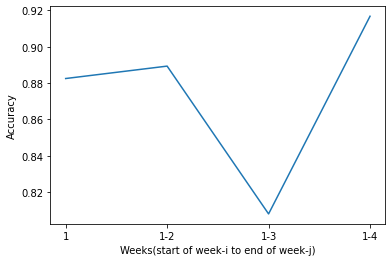

In [ ]:
# Accuracy graph - 4 models
x1 = ['1','1-2','1-3','1-4']
y1 = [accuracy_score(y_test1, predictions_st1_4), accuracy_score(y_test12, predictions_st12_4), accuracy_score(y_test123, predictions_st123_4), accuracy_score(y_test1234, predictions_st1234_4)]
plt.plot(x1, y1)
plt.xlabel("Weeks(start of week-i to end of week-j)")
plt.ylabel("Accuracy")
plt.savefig('weeks_vs_accuracy_4models1.png')
#plt.show()

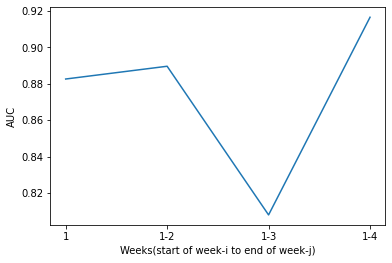

In [ ]:
# AUC graph - 4 models
x1 = ['1','1-2','1-3','1-4']
y1 = [roc_auc_score(y_test1, predictions_st1_4), roc_auc_score(y_test12, predictions_st12_4), roc_auc_score(y_test123, predictions_st123_4), roc_auc_score(y_test1234, predictions_st1234_4)]
plt.plot(x1, y1)
  
plt.xlabel("Weeks(start of week-i to end of week-j)")
plt.ylabel("AUC")
plt.savefig('weeks_vs_AUC_4models1.png')
plt.show()

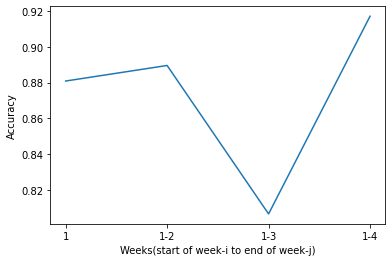

In [ ]:
# Accuracy graph - 3 models
x1 = ['1','1-2','1-3','1-4']
y1 = [accuracy_score(y_test1, predictions_st1_3), accuracy_score(y_test12, predictions_st12_3), accuracy_score(y_test123, predictions_st123_3), accuracy_score(y_test1234, predictions_st1234_3)]
plt.plot(x1, y1)
  
plt.xlabel("Weeks(start of week-i to end of week-j)")
plt.ylabel("Accuracy")
plt.savefig('weeks_vs_accuracy_3models1.png')
#plt.show()

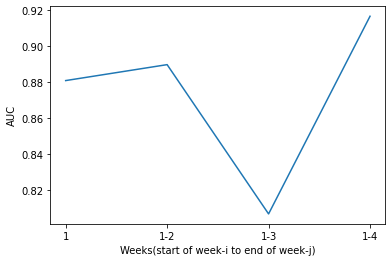

In [ ]:
# AUC graph - 3 models
x1 = ['1','1-2','1-3','1-4']
y1 = [roc_auc_score(y_test1, predictions_st1_3), roc_auc_score(y_test12, predictions_st12_3), roc_auc_score(y_test123, predictions_st123_3), roc_auc_score(y_test1234, predictions_st1234_3)]
plt.plot(x1, y1)
  
plt.xlabel("Weeks(start of week-i to end of week-j)")
plt.ylabel("AUC")
plt.savefig('weeks_vs_AUC_3models1.png')
plt.show()